In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv("./cleaned_text.csv")
df.head()

,Id,Title,Body,Tags,cleaned_title,cleaned_body
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,check upload file imag without mime type,like check upload file imag file png jpg jpeg ...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,prevent firefox close press,favorit editor vim regular use execut certain ...
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,error invalid type list variabl,import matlab file construct data frame matlab...
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,replac special charact url,probabl simpl simpli cannot find answer basica...
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,modifi whoi contact detail,function modifi mcontact testhttpapicom api co...


In [4]:
df.shape

(6034195, 6)

In [5]:
df.isnull().sum()

Id                  0
Title               0
Body                0
Tags                8
cleaned_title    9130
cleaned_body      381
dtype: int64

In [6]:
df = df.dropna()
df.shape

(6024691, 6)

In [7]:
df.isnull().sum()

Id               0
Title            0
Body             0
Tags             0
cleaned_title    0
cleaned_body     0
dtype: int64

In [8]:
df.head()

,Id,Title,Body,Tags,cleaned_title,cleaned_body
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,check upload file imag without mime type,like check upload file imag file png jpg jpeg ...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,prevent firefox close press,favorit editor vim regular use execut certain ...
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,error invalid type list variabl,import matlab file construct data frame matlab...
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,replac special charact url,probabl simpl simpli cannot find answer basica...
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,modifi whoi contact detail,function modifi mcontact testhttpapicom api co...


In [9]:
df['Question']= df.cleaned_title. str . cat (df.cleaned_body)


In [10]:
df.head()

,Id,Title,Body,Tags,cleaned_title,cleaned_body,Question
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,check upload file imag without mime type,like check upload file imag file png jpg jpeg ...,check upload file imag without mime typelike c...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,prevent firefox close press,favorit editor vim regular use execut certain ...,prevent firefox close pressfavorit editor vim ...
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,error invalid type list variabl,import matlab file construct data frame matlab...,error invalid type list variablimport matlab f...
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,replac special charact url,probabl simpl simpli cannot find answer basica...,replac special charact urlprobabl simpl simpli...
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,modifi whoi contact detail,function modifi mcontact testhttpapicom api co...,modifi whoi contact detailfunction modifi mcon...


In [11]:
df.columns

Index(['Id', 'Title', 'Body', 'Tags', 'cleaned_title', 'cleaned_body',
       'Question'],
      dtype='object')

In [12]:
data_frame=df.reindex(columns=['Question','Tags'])

In [13]:
data_frame.head()

,Question,Tags
0,check upload file imag without mime typelike c...,php image-processing file-upload upload mime-t...
1,prevent firefox close pressfavorit editor vim ...,firefox
2,error invalid type list variablimport matlab f...,r matlab machine-learning
3,replac special charact urlprobabl simpl simpli...,c# url encoding
4,modifi whoi contact detailfunction modifi mcon...,php api file-get-contents


In [14]:
data_frame=data_frame[:1000000]
data_frame.shape

(1000000, 2)

In [15]:
data_frame = data_frame.astype("U")

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(), binary="true")
multilabel_output = vectorizer.fit_transform(data_frame["Tags"])

In [16]:
def select_tags(num):
    selected_tags = multilabel_output.sum(axis=0).tolist()[0]
    sorted_tags = sorted(range(len(selected_tags)), key=lambda i: selected_tags[i], reverse=True)
    multilabel_outputs = multilabel_output[:, sorted_tags[:num]]
    return multilabel_outputs

In [17]:
def text_explaination(num):
    multilabel_output = select_tags(num)
    x = multilabel_output.sum(axis=1)
    return (np.count_nonzero(x==0))

In [18]:
text_explained = []
total_tags = multilabel_output.shape[1]
total_queries = data_frame.shape[0]
for i in tqdm(range(500, total_tags, 100)):
    text_explained.append(np.round(((total_queries - text_explaination(i))/total_queries)*100, 3))

100%|████████████████████████████████████████████████████████████████████████████████| 345/345 [01:22<00:00,  4.20it/s]


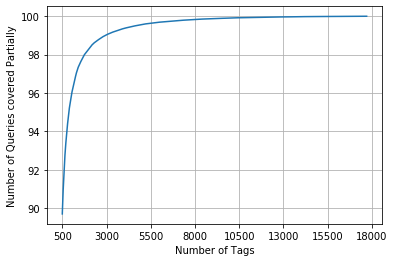

8000 cover 99.426 % of queries.


In [19]:
fig, ax = plt.subplots()
ax.plot(text_explained)
xlabel = list(500 + np.array(range(-50, 450, 50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of Tags")
plt.ylabel("Number of Queries covered Partially")
plt.grid()
plt.show()

tags_num = 8000
print(tags_num, "cover", text_explained[int(tags_num/100 - 5)], "% of queries.")

In [20]:
multilabel_outputs = select_tags(tags_num)
print("Total number of Tags:", multilabel_output.shape[1])
print("Number of Tags Considered:", multilabel_outputs.shape[1])
print("We considered", (multilabel_outputs.shape[1]/multilabel_output.shape[1])*100, "% of total tags, \
that cover", text_explained[int(tags_num/100 - 5)], "% of queries.")

Total number of Tags: 34942
Number of Tags Considered: 8000
We considered 22.895083280865432 % of total tags, that cover 99.426 % of queries.


In [21]:
data_frame.shape

(1000000, 2)

In [22]:
preprocessed_df = data_frame[["Question","Tags"]]
print("Shape of preprocessed data :", preprocessed_df.shape)

Shape of preprocessed data : (1000000, 2)


In [23]:
preprocessed_df.head()

,Question,Tags
0,check upload file imag without mime typelike c...,php image-processing file-upload upload mime-t...
1,prevent firefox close pressfavorit editor vim ...,firefox
2,error invalid type list variablimport matlab f...,r matlab machine-learning
3,replac special charact urlprobabl simpl simpli...,c# url encoding
4,modifi whoi contact detailfunction modifi mcon...,php api file-get-contents


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df, multilabel_outputs, test_size = 0.2,random_state = 42)
print("Number of data points in training data :", X_train.shape[0])
print("Number of data points in test data :", X_test.shape[0])

Number of data points in training data : 800000
Number of data points in test data : 200000


In [57]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [34]:
def nb_train(x_train, X_test, y_train, y_test, algo):
    alpha = [10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000005,0.000001]
    accuracy_cv = []

    for i in alpha[0:]:
        if (algo == 'Multinomial'):
            nb = MultinomialNB(alpha=i)
        elif (algo == 'Bernoulli'):
            nb = BernoulliNB(alpha=i)
        nb.fit(X_train, y_train)
        
        prediction = nb.predict(X_test)
        
        acc_cv = accuracy_score(y_test, prediction)
        f1_cv = f1_score(y_test, prediction, average='macro')
        precision_cv = precision_score(y_test, prediction, average='macro')
        recall_cv = recall_score(y_test, prediction, average='macro')
        
        print("FOR α =", i)
        print("The accuracy of the model is:", acc_cv*100)
        print("The f1_score of the model is:", f1_cv*100)
        print("The precision_score of the model is:", precision_cv*100)
        print("The recall_score of the model is:", recall_cv*100)
        print("=="*60)
        
        accuracy_cv.append(acc_cv)
        
    # Plot λ vs auc_score graph
    plt.plot(alpha, accuracy_cv, 'b-', label="Cross Validation Data")
    plt.legend(loc='lower right')
    plt.title("α v/s Auc Score")
    plt.ylabel('Auc Score')
    plt.xlabel('alpha (α)')
    plt.show()

In [35]:

def nb_test(X_train, y_train, X_test, y_test, optimal_alpha, algo):
    if (algo == 'Multinomial'):
        nb = MultinomialNB(alpha=optimal_alpha)
    elif (algo == 'Bernoulli'):
        nb = BernoulliNB(alpha=optimal_alpha)
    nb.fit(X_train, y_train)
    
    prediction = nb.predict(X_test)

    print("The accuracy of the model is:", accuracy_score(y_test, prediction)*100)
    print("The macro f1_score of the model is:", f1_score(y_test, prediction, average = 'macro')*100)
    print("The micro f1_score of the model is:", f1_score(y_test, prediction, average = 'micro')*100)
    print("The precision_score of the model is:", precision_score(y_test, prediction, average='macro')*100)
    print("The recall_score of the model is:", recall_score(y_test, prediction, average='macro')*100)
    print("The precision recall report for data:\n", classification_report(y_test, prediction))
    
    plot_confusion_matrix(y_test, prediction)
    plt.show()

In [36]:
count_vect = CountVectorizer(ngram_range=(1,2))
count_vect.fit(X_train)
# Fit should be done only to train data
# After fitting count_vect only learns the vocabulary of x_train i.e unique words(unique n-grams)

# To convert the SENTENCE into numerical vectors, we call transform()
x_train_bow = count_vect.transform(X_train)
x_test_bow = count_vect.transform(X_test)

In [37]:

print("The shape of the training data is:", x_train_bow.shape, y_train.shape)

print("The shape of the test data is:", x_test_bow.shape, y_test.shape)

The shape of the training data is: (2, 2) (800000, 8000)
The shape of the test data is: (2, 2) (200000, 8000)


In [40]:

tfidf_vect = TfidfVectorizer(stop_words=None, ngram_range=(1,2))
tfidf_vect.fit(X_train)
# Fit should be done only to train data
# After fitting tfidf_vect only learnss the vocabulary of x_train i.e unique words(unique n-grams)

# To convert the SENTENCE into numerical vectors, we call transform()
x_train_tfidf = tfidf_vect.transform(X_train)

x_test_tfidf = tfidf_vect.transform(X_test)

In [41]:
print("The shape of the training data is:", x_train_tfidf.shape, y_train.shape)
print("The shape of the test data is:", x_test_tfidf.shape, y_test.shape)

The shape of the training data is: (2, 2) (800000, 8000)
The shape of the test data is: (2, 2) (200000, 8000)


In [44]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-4.2.0-py3-none-any.whl size=109637 sha256=6058d06596f44c75a9808730afe6d9fdc9ecec7899da97b1f137b06a6dd0d0b9
  Stored in directory: c:\users\msi gaming\appdata\local\pip\cache\wheels\25\88\e3\7cd51a6379cac37213cac47545a27688782752ff66351b953d
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15


In [45]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [51]:
sentence_list = []
for sentence in X_train:
    sentence_list.append(sentence.split())

In [53]:
sentence_list_test = []
for sentence in X_test:
    sentence_list_test.append(sentence.split())

In [58]:
# Train your own Word2Vec model using your own train text corpus 

w2v_train_model = Word2Vec(sentence_list, size=50, workers=3)          # Considers only those words that occured atleast 5 times
print(type(w2v_train_model))

RuntimeError: you must first build vocabulary before training the model

In [49]:
avg_train_vector = []                         # Average w2v for each review/sentence is stored in this array
for sentence in tqdm():          # For each sentence/review
    sentence_vector = np.zeros(50)            # As word vectors are of zero length
    count_words = 0                           # Num of words with a valid vector in a sentence/review
    for word in sentence:
        try:
            vect = w2v_train_model.wv[word]
            sentence_vector += vect
            count_words += 1
        except:
            pass
    if count_words != 0:
        sentence_vector /= count_words
    avg_train_vector.append(sentence_vector)
avg_train_vector = np.array(avg_train_vector)

NameError: name 'Question' is not defined

In [27]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from datetime import datetime

In [ ]:
df.head()

In [ ]:
df.head()
